## Exploratory Data Analysis

In [47]:
# import libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [48]:
# Load the data
bsd = pd.read_csv("day.csv")

In [49]:
#bike sharing data set length and width
bsd.shape

(730, 16)

Note: There are 730 records with 16 columns in the dataset

In [50]:
bsd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [51]:
# check for missing values
bsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Note: There are no missing or null values  in the dataset

In [52]:
#check dataset high level statistics and distribution
bsd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [53]:
# check for duplicate values in the dataset

bsd.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Note:There are no duplicate values in the dataset

### Data Preparation Steps:

1) To improve the interpretation of the model convert categorical variables that are represented with numeric codes into categorical string values. These variables include 'season', 'weathersit', 'day', and 'month'. 

2) 'yr' column will be preserved because it shows a significant trend in the demand for bike-sharing between the years 2018 (coded as 0) and 2019 (coded as 1).

3) Purge any unnecessary columns that won't be used in the predictive model. These can include columns like 'instant', 'dteday', 'casual', and 'registered'. Here the focus of the prediction is on the total count which is represented by the 'cnt' column.

In [54]:
# identify categorical variables present in the dataset
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

# identify numerical variables present in the dataset
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

In [55]:
# Data Preparation

# Convert the categorical variables to appropriate data type
weather_mapping = {1: 'Clear', 2: 'MistCloudy', 3: 'LightSnow', 4: 'HeavyRainIce'}
season_mapping = {1: 'WINTER', 2: 'SPRING', 3: 'SUMMER', 4: 'FALL'}
month_mapping = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT',
                 11: 'NOV', 12:'DEC'}
day_mapping = {0: 'SUN', 1: 'MON', 2: 'TUE', 3: 'WED', 4: 'THU', 5: 'FRI', 6: 'SAT'}

In [56]:
bsd['season'] = bsd['season'].map(season_mapping)
bsd['weathersit'] = bsd['weathersit'].map(weather_mapping)
bsd['mnth'] = bsd['mnth'].map(month_mapping)
bsd['weekday'] = bsd['weekday'].map(day_mapping)

# Convert the categorical variables to category data type
bsd[cat_vars] = bsd[cat_vars].astype('category')

# Drop the columns 'instant', 'dteday', 'casual', 'registered' as they are not required for analysis
bsd = bsd.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Check the data after data preparation
bsd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,WINTER,0,JAN,0,SAT,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,985
1,WINTER,0,JAN,0,SUN,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,801
2,WINTER,0,JAN,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,WINTER,0,JAN,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,WINTER,0,JAN,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Univariate Analysis

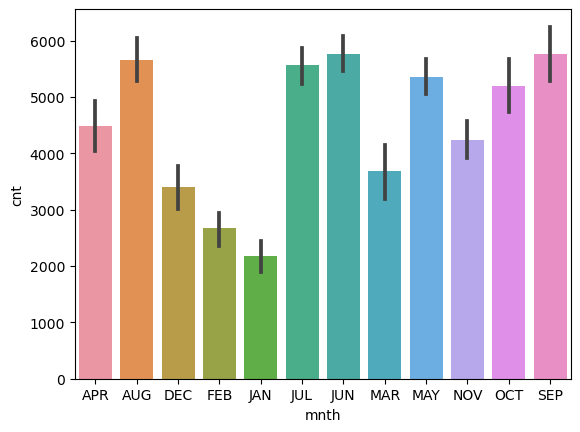

In [57]:
sns.barplot(x = 'mnth', y = 'cnt', data = bsd)
plt.show()

Note: We could see from the graph that begining of the year will start with less demand and demand will start increasing and reaches peak during mid year and falls back again at the end of the year

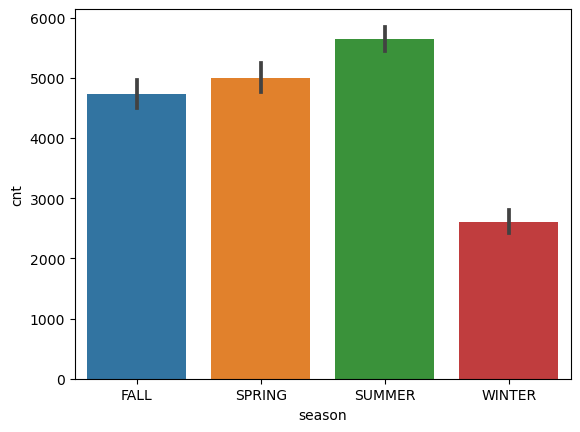

In [58]:
sns.barplot(x = 'season', y = 'cnt', data = bsd)
plt.show()

Note: Demand is most in Summer and least in winter.

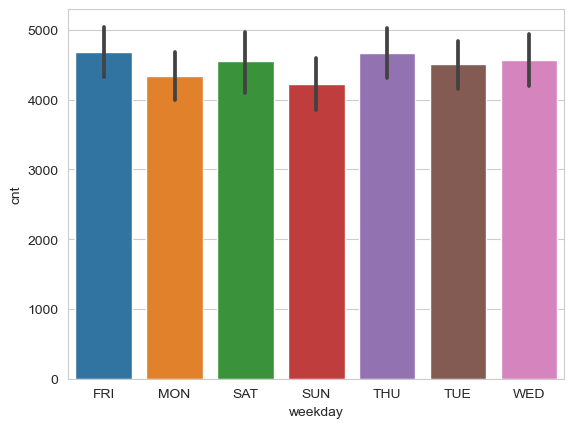

In [90]:
sns.barplot(x = 'weekday', y = 'cnt', data = bsd)
plt.show()

Note: No pattern can be found whether it is a weekday or weekend

## Bivariate Analysis

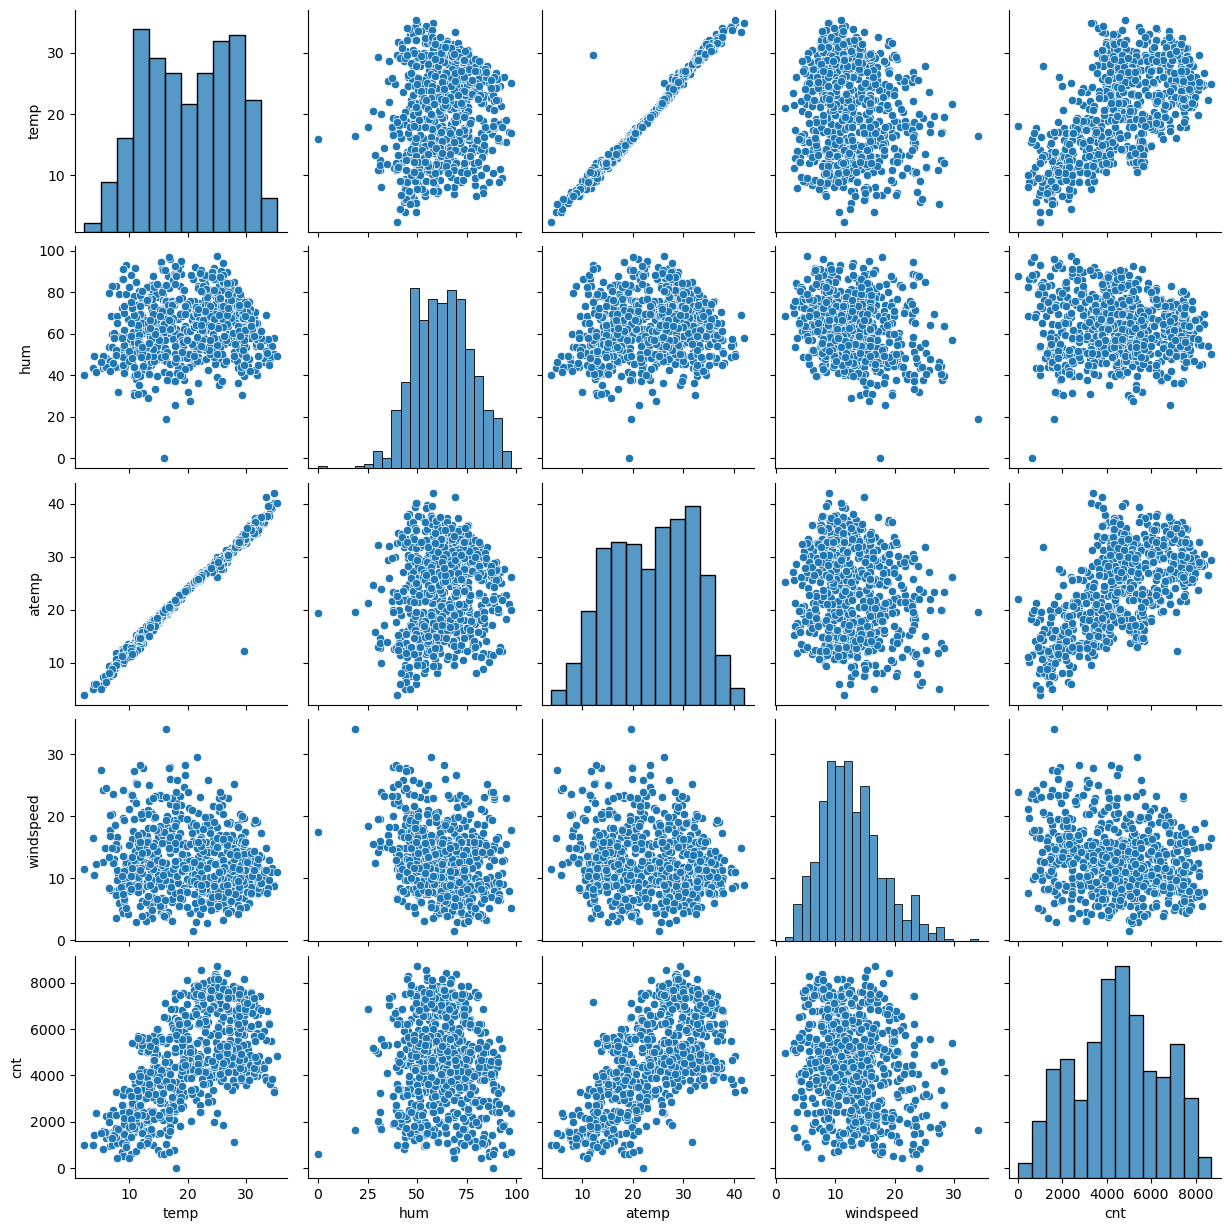

In [59]:
sns.pairplot(bsd[['temp','hum','atemp','windspeed','cnt']])
plt.show()

Note: There is a strong positive correlation between temp and atemp

In [93]:
## There is a strong positive correlation between temp and atemp. Hence we can drop one of the columns

bsd.columns
bsd.drop(['atemp'],axis=1,inplace=True)

## Multivariate Analysis

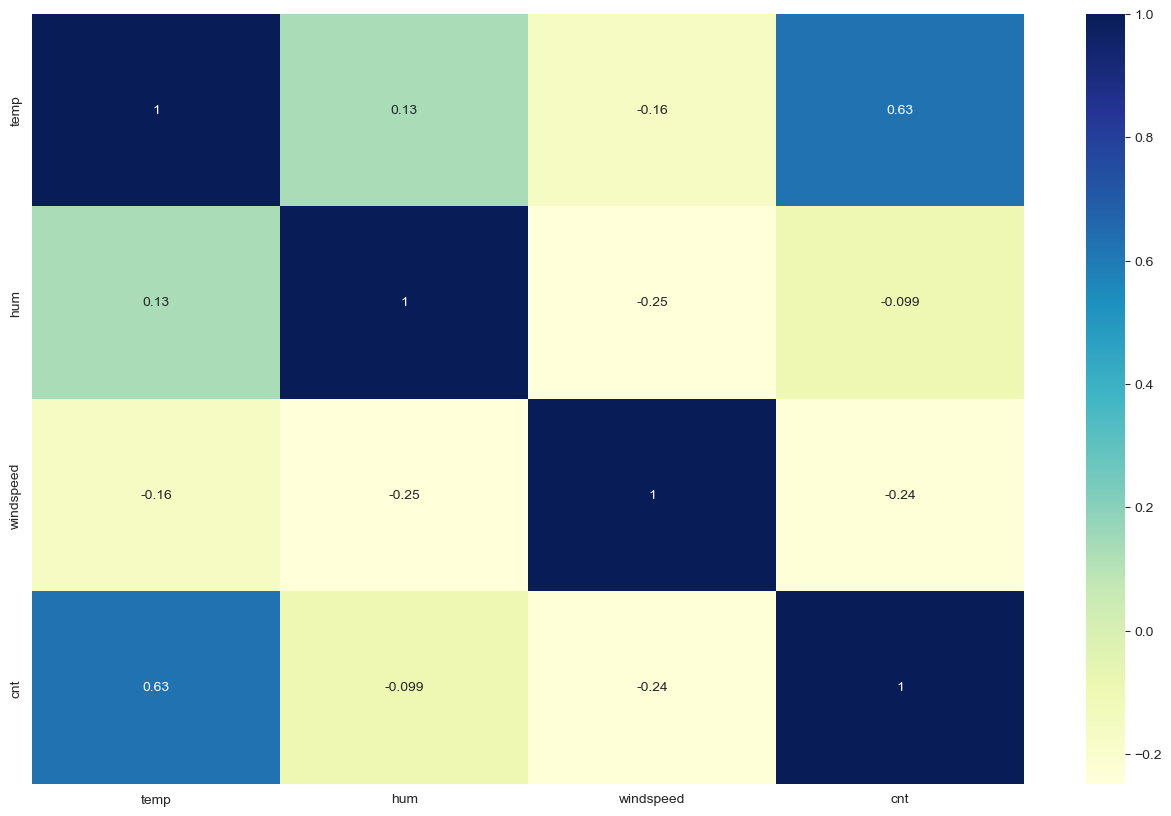

In [94]:
## Plotting the correlation matrix USING HEATMAP

# EXTRACTING THE NUMERICAL DATA
num_data = bsd.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16,10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='YlGnBu')
plt.show()


Note: cnt has positive correlation with  temp and negative correlation with hum and windspeed

## Model Building and evaluation

In [95]:
# Converting the categorical variables to dummy variables
bsd = pd.get_dummies(bsd, drop_first=True)

In [96]:
# Split the data into X and y
y = bsd['cnt']
X = bsd.drop(['cnt'], axis=1)

In [97]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a linear regression model for use in feature selection
lm = LinearRegression()

# Selecting 10 features with RFE
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# Columns selected by RFE
col = X.columns[rfe.support_]

In [100]:
col

Index(['temp', 'hum', 'windspeed', 'season_SUMMER', 'season_WINTER', 'yr_1',
       'mnth_OCT', 'mnth_SEP', 'holiday_1', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [46]:


# Reset the indices of y_train
y_train = y_train.reset_index(drop=True)

# Filter the training data for selected features
X_train_selected = pd.DataFrame(X_train, columns=X.columns).loc[:, col]

# Adding a constant to the model, because statsmodels' OLS doesn't include it by default
X_train_sm = sm.add_constant(X_train_selected)

# Fitting the model
lr_model = sm.OLS(y_train, X_train_sm).fit()

# Viewing the summary of the model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     240.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.91e-184
Time:                        19:24:27   Log-Likelihood:                -4143.2
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     500   BIC:                             8355.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [101]:
from sklearn.metrics import r2_score

# Reset the indices of y_test if necessary
y_test = y_test.reset_index(drop=True)

# Prepare X_test similarly to X_train
X_test_selected = pd.DataFrame(X_test, columns=X.columns)[col].reset_index(drop=True)
X_test_sm = sm.add_constant(X_test_selected)

# Making predictions
y_pred = lr_model.predict(X_test_sm)

# Calculating the R-squared value
r2_test = r2_score(y_test, y_pred)
print(f'R-squared on TEST SET: {r2_test}')

R-squared on TEST SET: 0.8261205469946891


## Residual Analysis

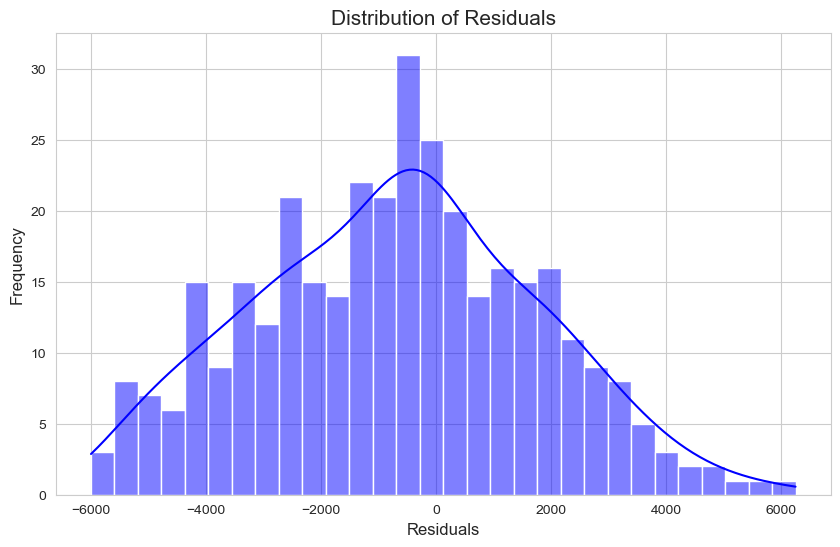

In [102]:
# Calculate the predictions on the training set
y_train_pred = lr_model.predict(X_train_sm)

# Calculate the residuals
residuals = y_train - y_train_pred

# Setting the aesthetics for the plots
sns.set_style('whitegrid')

# Plotting the histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals', fontsize=15)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

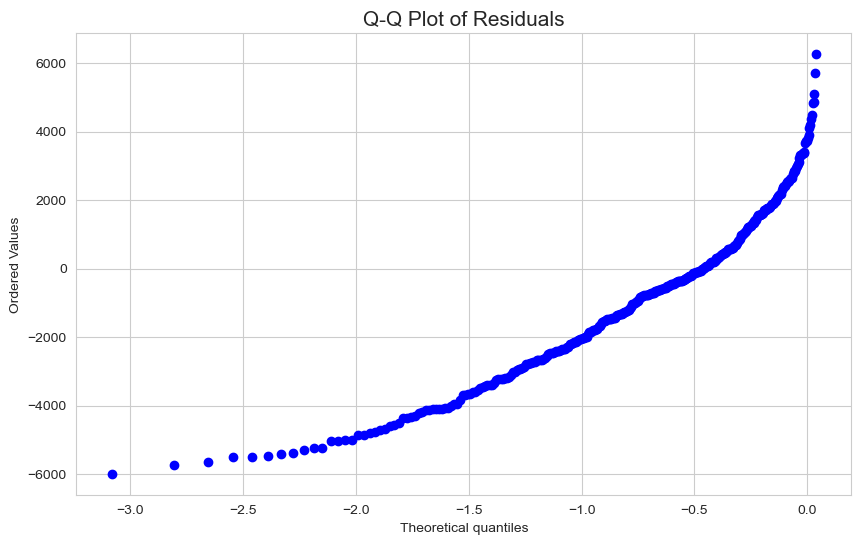

In [103]:


# Plotting the Q-Q plot of the residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=15)
plt.show()

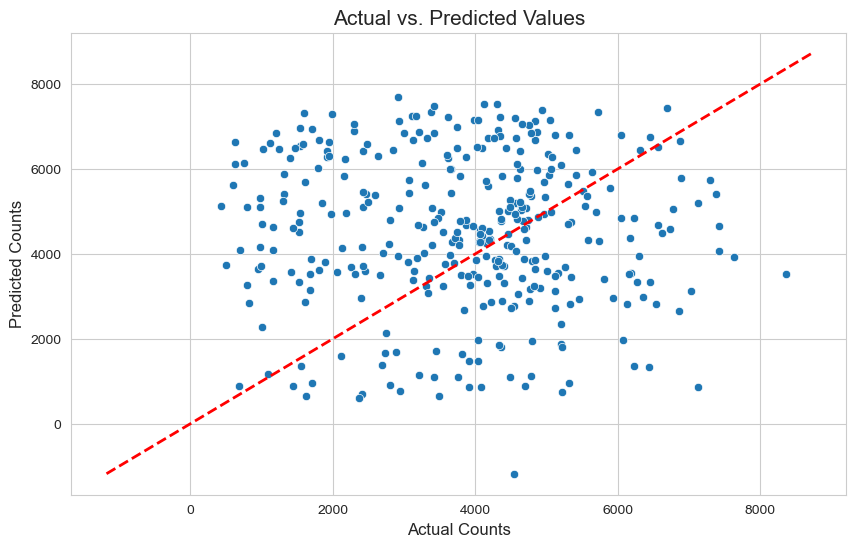

In [104]:
# Importing necessary libraries for plotting


# Setting the aesthetics for the plots
sns.set_style('whitegrid')

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title('Actual vs. Predicted Values', fontsize=15)
plt.xlabel('Actual Counts', fontsize=12)
plt.ylabel('Predicted Counts', fontsize=12)

# Plotting the line of perfect predictions
max_val = max(y_train.max(), y_train_pred.max())
min_val = min(y_train.min(), y_train_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--')

plt.show()
